In [46]:
%matplotlib notebook
import gba
import numpy as np
import matplotlib.pyplot as plt

In [47]:
g = gba.GbA()
g.init()

In [48]:
data = np.array([[0.00038221, 0.00067219, 0.00056877, 0.0014739, 
                  0.0022047, 0.0031288, 0.0015537, 0.00038673, 
                  0.00012311]])
nsim = 30
mean = np.zeros((2))
cov = np.zeros((2,2))
g.compute_likelihood(data,nsim,mean,cov)

<IPython.core.display.Javascript object>


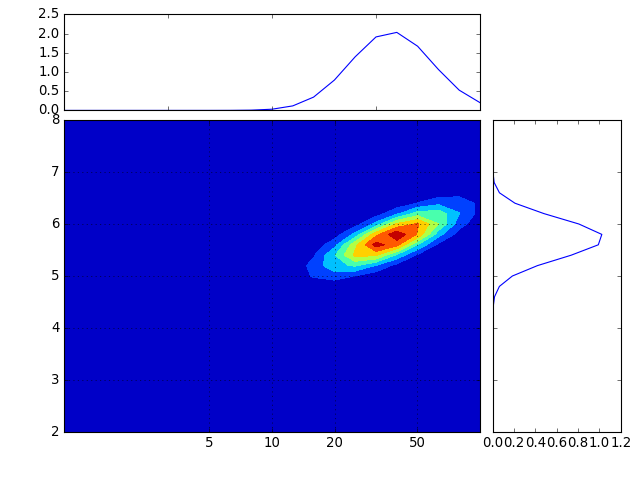

5.8
1.6


In [49]:
import scipy.stats as stats
from matplotlib.ticker import NullFormatter

m = np.linspace(2, 8, 31)
r = np.linspace(0,2.0,21)
M, R = np.meshgrid(m, r)
pos = np.empty(M.shape + (2,))
pos[:, :, 0] = R; pos[:, :, 1] = M
rv = stats.multivariate_normal(mean, cov)
fig = plt.figure()

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rectpdf = [left, bottom, width, height]
rectr = [left, bottom_h, width, 0.2]
rectm = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
fig = plt.figure(1, figsize=(8, 8))
axpdf = fig.add_axes(rectpdf)
axm = fig.add_axes(rectm)
axr = fig.add_axes(rectr)

axpdf.contourf(R, M, rv.pdf(pos))
axpdf.set_xticks([np.log10(x) for x in [5,10,20,50]])
axpdf.set_xticklabels([5,10,20,50])
axpdf.grid()

# compute marginals
p = rv.pdf(pos)
dr = np.diff(r).mean()
dm = np.diff(m).mean()
mp = np.trapz(p,x=r,axis=0)
rp = np.trapz(p,x=m,axis=1)
mp_normed = mp/np.trapz(mp,m,dm)
rp_normed = rp/np.trapz(rp,r,dr)
axm.plot(mp_normed,m)
axr.plot(r,rp_normed)
print m[np.argmax(mp)]
print r[np.argmax(rp)]

# no labels
nullfmt = NullFormatter()
axm.yaxis.set_major_formatter(nullfmt)
axr.xaxis.set_major_formatter(nullfmt)
